In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from collections import Counter
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from subprocess import check_output

In [ ]:
median_household_income = pd.read_csv("//content/MedianHouseholdIncome2015 (1).csv", encoding="windows-1252")

median_household_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [ ]:
percent_over_25_completed_high_school = pd.read_csv("/content/PercentOver25CompletedHighSchool (1).csv", encoding="windows-1252")
percent_over_25_completed_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
percent_poeple_below_poverty = pd.read_csv("/content/PercentagePeopleBelowPovertyLevel (1).csv", encoding="windows-1252")
percent_poeple_below_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
police_killing_us = pd.read_csv("/content/PoliceKillingsUS (1).csv", encoding="windows-1252")
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
share_race_by_city = pd.read_csv("/content/ShareRaceByCity.csv", encoding="windows-1252")
share_race_by_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


### percent_poeple_below_poverty analyzing

In [ ]:
percent_poeple_below_poverty.isnull().count()

Geographic Area    29329
City               29329
poverty_rate       29329
dtype: int64

In [ ]:
percent_poeple_below_poverty["poverty_rate"]

0        78.8
1        29.1
2        25.5
3        30.7
4          42
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328       0
Name: poverty_rate, Length: 29329, dtype: object

In [ ]:
percent_poeple_below_poverty.poverty_rate.replace(['-'],0.0,inplace = True)

In [ ]:
percent_poeple_below_poverty.isnull().count()

Geographic Area    29329
City               29329
poverty_rate       29329
dtype: int64

In [ ]:
percent_poeple_below_poverty.poverty_rate = percent_poeple_below_poverty.poverty_rate.astype(float)

In [ ]:
area_list = list(percent_poeple_below_poverty['Geographic Area'].unique())

In [ ]:
area_list

['AL',
 'AK',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'HI',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'ND',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [ ]:
area_poverty_Ratio = percent_poeple_below_poverty.groupby("Geographic Area")["poverty_rate"].mean().reset_index()

In [ ]:
area_poverty_Ratio


,Geographic Area,poverty_rate
0,AK,18.678592
1,AL,20.611795
2,AR,22.963216
3,AZ,25.268071
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DC,18.000000
8,DE,12.555844
9,FL,17.508606


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Plotting figure BARCHART

#### additionally i made viridis my color palette. It looks nicer than basics

Text(0.5, 1.0, 'Poverty Rate Given States')

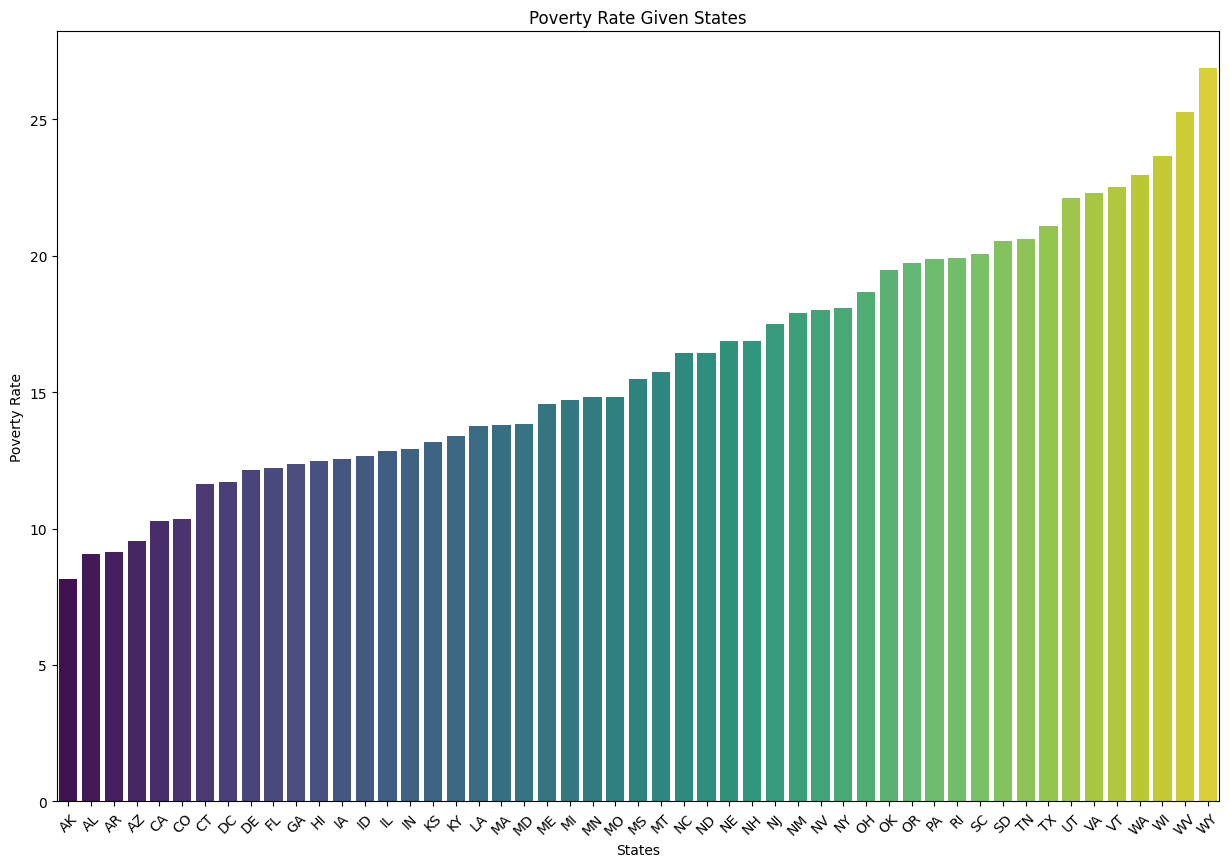

In [ ]:
plt.figure(figsize = (15, 10))
# Choose a color palette (e.g., "viridis")
color_palette = "viridis"
sns.barplot(x = area_poverty_Ratio['Geographic Area'],y=sorted(area_poverty_Ratio['poverty_rate']), palette = color_palette)
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [ ]:
police_killing_us.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


### most common surname of killed people

In [ ]:
# let's consider different killing types
police_killing_us['manner_of_death'].unique()

array(['shot', 'shot and Tasered'], dtype=object)

In [ ]:
# Data Cleaning
cleaned_kill = police_killing_us[police_killing_us['name'] != 'TK TK'].copy()

In [ ]:
cleaned_kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.0,M,NaN,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [ ]:
from collections import Counter

In [ ]:
# Name Separation
separate = cleaned_kill['name'].str.split()
#splitting one name into two separate names containing first name and last name
a, b = zip(*separate)
name_list = list(a + b)

# Handling Case Sensitivity
name_list = [name.lower() for name in name_list]

# Name Counting
name_count = Counter(name_list)

In [ ]:
name_count

In [ ]:
most_common_name = name_count.most_common(15)

In [ ]:
most_common_name

[('michael', 91),
 ('david', 57),
 ('james', 56),
 ('robert', 48),
 ('joseph', 48),
 ('william', 47),
 ('daniel', 46),
 ('john', 42),
 ('christopher', 40),
 ('lee', 37),
 ('richard', 36),
 ('j.', 32),
 ('anthony', 31),
 ('jose', 28),
 ('joshua', 28)]

In [ ]:
x,y = zip(*most_common_name)
x,y = list(x),list(y)

### figure

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

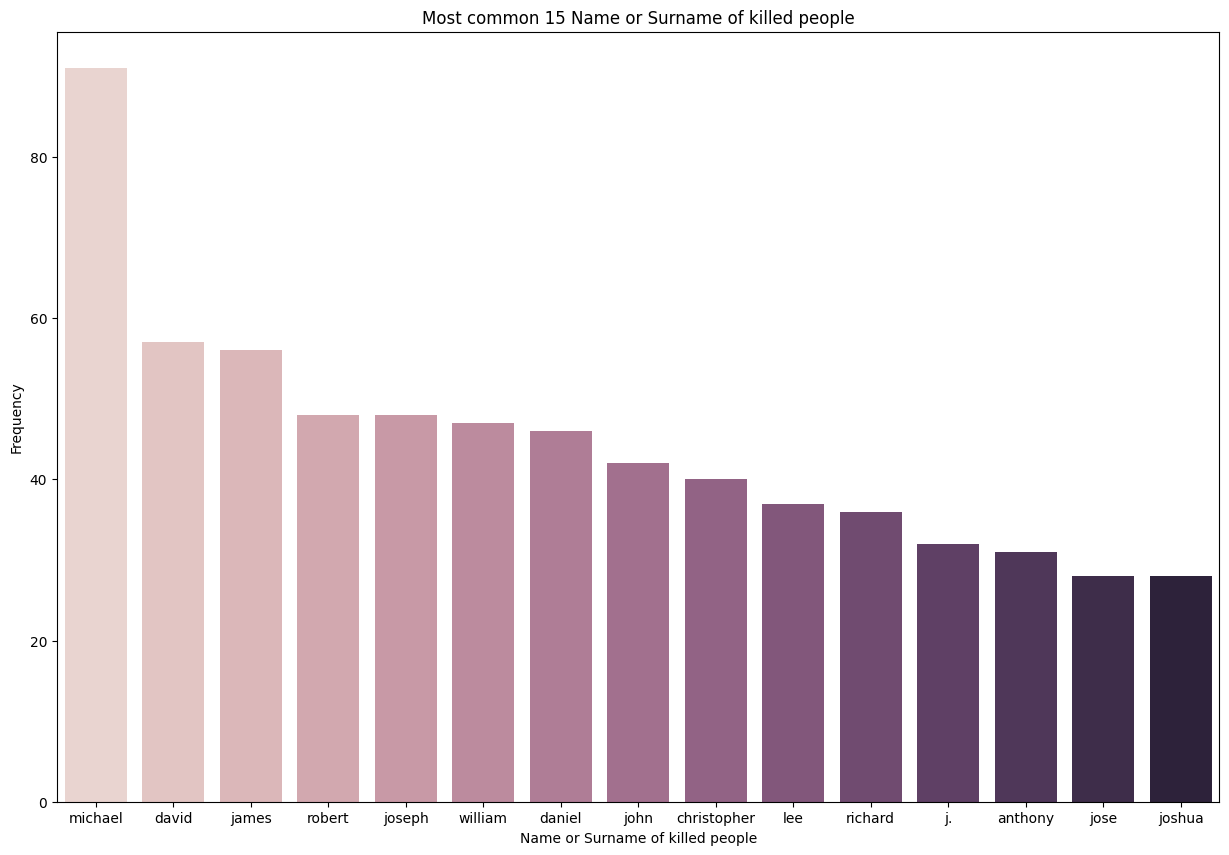

In [ ]:
plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [ ]:
percent_over_25_completed_high_school.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
percent_over_25_completed_high_school.percent_completed_hs.replace(['-'],0.0,inplace = True)

percent_over_25_completed_high_school.percent_completed_hs=percent_over_25_completed_high_school.percent_completed_hs.astype(float)
#percent_poeple_below_poverty.poverty_rate = percent_poeple_below_poverty.poverty_rate.astype(float)

In [ ]:
new_Df = percent_over_25_completed_high_school.groupby('percent_completed_hs').reset_index()

AttributeError: 'DataFrameGroupBy' object has no attribute 'reset_index'

In [ ]:
new_Df